In [670]:
import pandas as pd

In [671]:
%run ../modules/utils.ipynb
%run ../modules/preprocessing.ipynb
%run ../modules/cds.ipynb

In [714]:
# df = pd.read_excel('/Users/bryan/Documents/BioPharmaFinder/BaoLab/FirstBatch/Excels/S2to5combined_20ul_40min.xlsx')
df = pd.read_excel('/Users/bryan/Documents/BioPharmaFinder/BaoLab/FirstBatch/Excels/S6to10combined_20ul_40min.xlsx')
df = thermo_df(df)

In [705]:
# df_phe = pd.read_excel('/Users/bryan/Studio/tools/phe_76_5p.xlsx')
# df_dna = pd.read_excel('/Users/bryan/Studio/tools/glu_dna.xlsx')
df_dna = pd.read_excel('/Users/bryan/Studio/tools/NGS_24129_5p.xlsx')
# df_rna = pd.read_excel('/Users/bryan/Studio/tools/glu_76_5p.xlsx')
df_rna = pd.read_excel('/Users/bryan/Studio/tools/glu_76_3p.xlsx')

In [706]:
df_rna

,Unnamed: 0,Mass,Base,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17
0,1,267.09677,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,572.13807,C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,877.17937,C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,1206.23187,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,1535.28437,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,71,22900.06778,U,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
71,72,23205.10908,C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
72,73,23510.15038,C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
73,74,23815.19168,C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [704]:
target = 1333.14174
plotly_zone(df[(df.Mass>target-20)&(df.Mass<target+20)])

In [694]:
plotly_zone(df)

In [715]:
df[(df.Mass>24190)&(df.Mass<24350)]

,Mass,RT,Vol
929,24217.243539,24.322452,422837.02
991,24203.231085,24.387363,390638.21
1131,24303.227782,24.387363,311988.65
1515,24231.226603,24.322452,156115.21
1572,24260.184580,24.447681,147623.99
1627,24274.188285,24.322452,139890.88
1844,24245.238148,24.322452,106425.46
1876,24246.242980,24.387363,102726.86
1923,24317.218866,24.447681,96051.43
2021,24287.204705,24.322452,87460.68


In [722]:
df_match = match_dfs(df, df, shift=A)
df_match.shape

(244, 3)

In [723]:
plotly_zone(df_match)

In [716]:
df_match = match_dfs(df_dna, df)
df_matches = list()
shifts = list()
shifts_3p_cca = [16, 22, 24, 28]
shifts_3p_cc = [16, 22, 23, 24, 28]
shifts_5p = [4, 16, 22, 28]
shifts_rna = [-18, -4, -1, 0, 1, 2, 14, 16, 17]
# shifts_rna = 
# for shift in shifts_rna:
for shift in range(-200, 200, 1):
    df_shift = df_rna.copy()
    df_shift.Mass += shift
    df_shift_match = match_dfs(df_shift, df_mock_noad)
    if df_shift_match.shape[0]> 2:
        shifts.append(shift)
        print(df_shift_match.shape)
        df_matches.append(df_shift_match)

(3, 3)


KeyboardInterrupt: 

In [711]:
shifts

[-194, -17, 30, 111]

In [712]:
idx = 3
dftmp = [df]
dftmp.extend(df_matches)
# plotly_multi_zones(dftmp)
plotly_multi_zones(df_matches[:])
# plotly_multi_zones([df_matches[2], df_matches[5]])
# plotly_zone(df_matches[2])


# plotly_zone(df_matches[idx])

In [112]:
# df_merge = pd.concat([df_matches[3], df_matches[5]])
# df_merge = pd.concat([df_matches[3], df_matches[4]])
# df_merge = pd.concat([df_matches[1], df_matches[4]])
# df_merge = pd.concat([df_matches[1], df_matches[3]])
df_merge = pd.concat([df_matches[1], df_matches[3]])
df_merge = df_merge.drop_duplicates()
df_merge.to_excel('/Users/bryan/Documents/BioPharmaFinder/BaoLab/NGS/Shift/1.xlsx')

In [113]:
for i in range(1, 2, 1):
    in_name = f'/Users/bryan/Documents/BioPharmaFinder/BaoLab/NGS/Shift/{i}.xlsx'
    df = pd.read_excel(in_name)
    bcr = base_calling_random(df, silence=True)
    plotly_basecalling(*bcr, annotate=False)
    df_seats = process_mass_base_seats(*bcr, full_mass=full_mass, orientation=5)
    out_name = f'/Users/bryan/Documents/BioPharmaFinder/BaoLab/NGS/Shift/seats_{i}.xlsx'
    df_seats.to_excel(out_name)

In [160]:
df_dna.tail()

,Unnamed: 0,Mass,Base
70,71,22940.8681,A
71,72,23269.9206,A
72,73,23574.9619,C
73,74,23880.0032,C
74,75,24129.0894,A


In [277]:
df = pd.read_excel('/Users/bryan/Documents/BioPharmaFinder/BaoLab/FirstBatch/Excels/S2to5combined_20ul_40min.xlsx')
# df = pd.read_excel('/Users/bryan/Documents/BioPharmaFinder/BaoLab/FirstBatch/Excels/S6to10combined_20ul_40min.xlsx')
df = thermo_df(df)
df_dna = pd.read_excel('/Users/bryan/Studio/tools/glu_dna.xlsx')

df_mock_noad = pd.read_excel('/Users/bryan/Documents/BioPharmaFinder/BaoLab/FirstBatch/Excels/1_Mock_10ul_9min_NewOmics.xlsx')
df_rsv_noad = pd.read_excel('/Users/bryan/Documents/BioPharmaFinder/BaoLab/FirstBatch/Excels/6_RSV1_10ul_9min_NewOmics.xlsx')
df_mock_noad = thermo_df(df_mock_noad)
df_rsv_noad = thermo_df(df_rsv_noad)
df_mock = pd.read_excel('/Users/bryan/Documents/BioPharmaFinder/BaoLab/FirstBatch/Excels/S2to5combined_20ul_40min.xlsx')
df_rsv = pd.read_excel('/Users/bryan/Documents/BioPharmaFinder/BaoLab/FirstBatch/Excels/S6to10combined_20ul_40min.xlsx')
df_mock = thermo_df(df_mock)
df_rsv = thermo_df(df_rsv)


In [566]:
df_25k_rsv = df_rsv[df_rsv.Mass>22000]
plotly_zone(df_25k_rsv, y='Vol')

In [630]:
# plotly_zone(df_mock_noad)
# plotly_zone(df_rsv_noad)
# df_25k_mock_noad = df_mock_noad[(df_mock_noad.Mass>6000)&((df_mock_noad.Mass<13000))&(df_mock_noad.RT<3.6)]
# df_25k_rsv_noad = df_rsv_noad[(df_rsv_noad.Mass>6000)&(df_rsv_noad.Mass<13000)&(df_rsv_noad.RT<3.6)&(df_25k_rsv_noad.RT>2)]
# plotly_zones(df_25k_mock_noad, df_25k_rsv_noad)
# plotly_zone(df_25k_rsv_noad)




In [638]:
plotly_zone(df_mock_noad[(df_mock_noad.Mass>6000)&(df_mock_noad.Mass<13000)], y='Vol')
plotly_zone(df_rsv_noad[(df_rsv_noad.Mass>6000)&(df_rsv_noad.Mass<13000)], y='Vol')

In [ ]:

df1 = match_dfs(df_rsv_noad, df_mock_noad)
df2 = match_dfs(df_mock_noad, df_rsv_noad)
df_mock_rest = df_mock_noad.drop(df1.index)
df_rsv_rest = df_rsv_noad.drop(df2.index)
# plotly_zone(df_mock_rest)
# plotly_zone(df_rsv_rest)

In [667]:

df_25k_mock_noad = df_mock_rest[(df_mock_rest.Mass>6000)&((df_mock_rest.Mass<13000))&(df_mock_rest.RT<3.6)]
df_25k_rsv_noad = df_rsv_rest[(df_rsv_rest.Mass>6000)&(df_rsv_rest.Mass<13000)&(df_rsv_rest.RT<3.6)&(df_rsv_rest.RT>2)]
# plotly_zones(df_25k_mock_noad, df_25k_rsv_noad)
plotly_zone(df_25k_mock_noad, y='Vol')
plotly_zone(df_25k_rsv_noad, y='Vol')
df_25k_mock_noad.to_excel('/Users/bryan/Documents/BioPharmaFinder/BaoLab/FirstBatch/PaperData/GluCleavage/mock.xlsx')
df_25k_rsv_noad.to_excel('/Users/bryan/Documents/BioPharmaFinder/BaoLab/FirstBatch/PaperData/GluCleavage/rsv.xlsx')


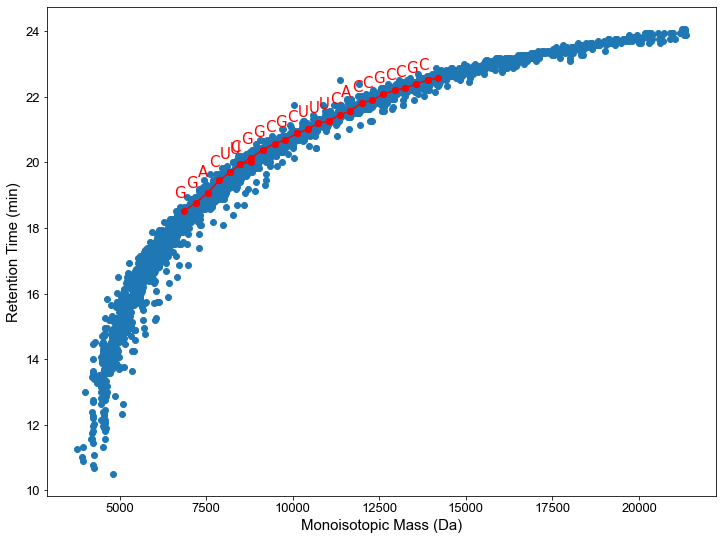

In [666]:
%run ../modules/utils.ipynb
mask = df_m.focus.notna()
df_m_focus = df_m[mask]
mask = df_r.focus.notna()
df_r_focus = df_r[mask]
# plotly_zones(df_m_focus, df_r_focus)

bcr = base_calling_random(df_m_focus, silence=True)
# plt.scatter(df_m.Mass, df_m.RT)
plt, _ = plot_basecalling(df_m, bcr[1], plt=plt, annotate=False)
# bcr = base_calling_random(df_r_focus, silence=True)
# plotly_basecalling(*bcr, annotate=False)

In [616]:
print(df_mock_noad.shape, df_rsv_noad.shape)
df_ngs = pd.read_excel('~/Documents/BioPharmaFinder/BaoLab/NGS/tRNA-Glu-CTC_CNvRSV_EJ_dna_rsv.xlsx')
df_ngs.Mass.unique().shape

(677, 3) (799, 3)


(347,)

In [568]:
idxs = list()
# create our callback function
def on_selection(trace, points, selector):
    print('points {}'.format(points.point_inds) )
    idxs.extend(points.point_inds)

def on_click(trace, points, selector):
#     print('points {}'.format(points.point_inds) )
    idxs.extend(points.point_inds)

df_sample = df_rsv_noad
f = zone_selection(df_sample, on_selection=on_selection, on_click=on_click)
f

FigureWidget({
    'data': [{'marker': {'color': [#6371f2, #6371f2, #6371f2, ..., #6371f2,
                   …

points [213, 214, 229, 236, 253, 273, 284, 286, 289, 291, 299, 304, 307, 318, 329, 330, 344, 351, 352, 353, 354, 355, 359, 360, 361, 362, 367, 368, 369, 373, 376, 377, 385, 386, 391, 394, 395, 397, 398, 406, 407, 412, 414, 416, 419, 420, 423, 428, 429, 436, 438, 439, 442, 446, 450, 451, 454, 458, 467, 470, 473, 482, 483, 484, 485, 488, 492, 493, 495, 498, 499, 503, 504, 505, 507, 512, 515, 523, 526, 531, 532, 533, 536, 542, 544, 546, 547, 551, 553, 562, 563, 564, 565, 567, 570, 572, 574, 576, 577, 580, 581, 586, 587, 589, 590, 591, 600, 604, 605, 606, 610, 614, 615, 616, 617, 620, 625, 626, 628, 630, 633, 635, 639, 643, 645, 646, 651, 652, 654, 656, 657, 659, 660, 661, 662, 663, 670, 671, 673, 676, 679, 680, 682, 684, 687, 688, 689, 691, 693, 694, 697, 702, 704, 710, 712, 720, 723, 724, 726, 729, 733, 740, 742, 743, 748, 751, 753, 759, 762, 765, 774, 779, 792, 793, 794]


In [569]:
df_chosen = df_sample.iloc[idxs]
# df_zone = df_sample.drop(df_chosen.index)
df_chosen.shape

(175, 3)

In [570]:
df_tmp = df_chosen.groupby('RT').head(2)
plotly_zone(df_tmp)
df_tmp.shape

(84, 3)

In [ ]:
ngs_5p = df_ngs_5p.Mass
ngs_5p_m1 = ngs_5p + M
ngs_5p_m1d2 = ngs_5p_m1 + 2 * 2
ngs_5p_m2d2 = ngs_5p_m1d2 + M
ngs_5p_m3d2 = ngs_5p_m2d2 + M
ngs_5p_m4d2 = ngs_5p_m3d2 + M
ngs_5p_m5d2 = ngs_5p_m4d2 + M

In [285]:
dfs = list()
dfs_mock = list()
dfs_rsv = list()
# shifts = [0, 14, 16, 17, 18, 32, 46, 60, 76]
shifts = [0, 14, 2, 4, 18, 32, 46]
for shift in shifts:
    df_shift = df_dna.copy()
    df_shift.Mass -= H2O
    df_shift.Mass += shift
    df_shift_match = match_dfs(df_shift, df_mock_noad)
    if df_shift_match.shape[0] > 0:
        print('Mock ', shift, df_shift_match.shape)
        dfs_mock.append(df_shift_match)
    df_shift_match = match_dfs(df_shift, df_rsv_noad)
    if df_shift_match.shape[0] > 0:
        print('RSV ', shift, df_shift_match.shape)
        dfs_rsv.append(df_shift_match)
#     plotly_zone(df_shift_match)

Mock  14 (6, 3)
RSV  14 (3, 3)
Mock  2 (2, 3)
RSV  2 (1, 3)
Mock  18 (13, 3)
RSV  18 (5, 3)
Mock  32 (1, 3)
RSV  32 (1, 3)
Mock  46 (1, 3)
RSV  46 (1, 3)


In [295]:
df_rsv_diff = pd.read_excel('/Users/bryan/Documents/BioPharmaFinder/Draw/Source/Fig4_Data_rsv_diff.xlsx')
plotly_zone(df_rsv_diff, y='Vol')

In [644]:
df_mid_mock = df_mock[(df_mock.Mass>8695) & (df_mock.Mass<12750)]
plotly_zone(df_mid_mock, y='Vol')
df_mid_rsv = df_rsv[(df_rsv.Mass>8695) & (df_rsv.Mass<12750)]
plotly_zone(df_mid_rsv, y='Vol')

In [425]:
masses = [9460.118, 10110.21, 10722.28, 11643.42]

In [642]:
mass = 8106.712 + H2O
df_cds, _ = computational_data_seperation(df_rsv, df_rsv, mass, ignore_endpoints=True)
plotly_zone(df_cds)

full_mass 8124.7226 sum_value 8142.7


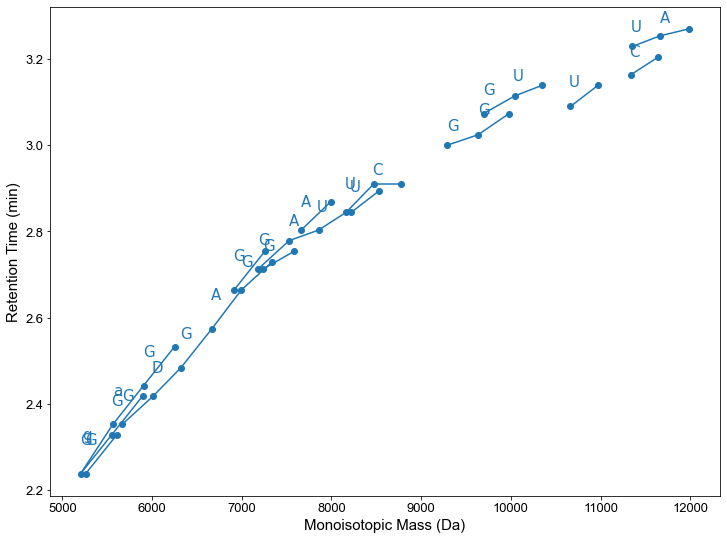

In [650]:
# df_merge = df_cca #pd.concat(l)

dfa = df_chosen.copy()
dfb = df_sample.drop(df_chosen.index).copy()
dfa['chosen'] = True
dfb['chosen'] = False
df_merge = pd.concat([dfa, dfb]).drop_duplicates(subset=['Mass'])
bcr = base_calling_random(df_tmp, silence=True)

plotly_basecalling(*bcr, annotate=False)
plt, _ = plot_basecalling(*bcr, annotate=False)

# name = 'mock' + '_5pUGGUC'
# df_merge.to_excel(f'/Users/bryan/Documents/BioPharmaFinder/BaoLab/FirstBatch/PaperData/Glu/{name}.xlsx')
# plt.savefig(f'/Users/bryan/Documents/BioPharmaFinder/BaoLab/FirstBatch/PaperData/Glu/{name}.svg', dpi=300, transparent=True)

# df_seats = process_mass_base_seats(*bcr, full_mass=full_mass, orientation=5)
# out_name = f'/Users/bryan/Documents/BioPharmaFinder/BaoLab/NGS/Shift/seats_3.xlsx'
# df_seats.to_excel(out_name)

In [321]:
def homology_groups(df):
    """ given ~25k area dots, doing homology search
        return a list of group, each group represents a tRNA specy and its isoforms 
    """
    def create_graph(bcr):
        G = nx.Graph()
        for x in bcr[1]:
            G.add_edge(x[0], x[1], name=x[2])

        cc = list(nx.connected_components(G))
        subgraphs = [G.subgraph(x) for x in cc]
        subgraphs.sort(key=len, reverse=True)
        return subgraphs
    
    bcr = base_calling_random(df, silence=True)
    subgraphs = create_graph(bcr)
    subgraphs_edges = [ [(x[0], x[1], x[2].get('name')) for x in sg.edges(data=True)] for sg in subgraphs]
    subgraphs_edges = [sorted(sg_edges, key=lambda x: x[0]) for sg_edges in subgraphs_edges]
    subgraphs_nodes = [list(sg.nodes) for sg in subgraphs]
    
    node_edge_pairs = list()
    for group in range(len(subgraphs)):
        df_nodes = df[df.Mass.isin(subgraphs_nodes[group])]
        edges = subgraphs_edges[group]
        node_edge_pairs.append((df_nodes, edges))
    
    return node_edge_pairs

In [651]:
groups = basecalling_groups(df_tmp)

mass_x (84,) mass_y (84,)


In [655]:
plotly_basecalling(*groups[2], annotate=False)

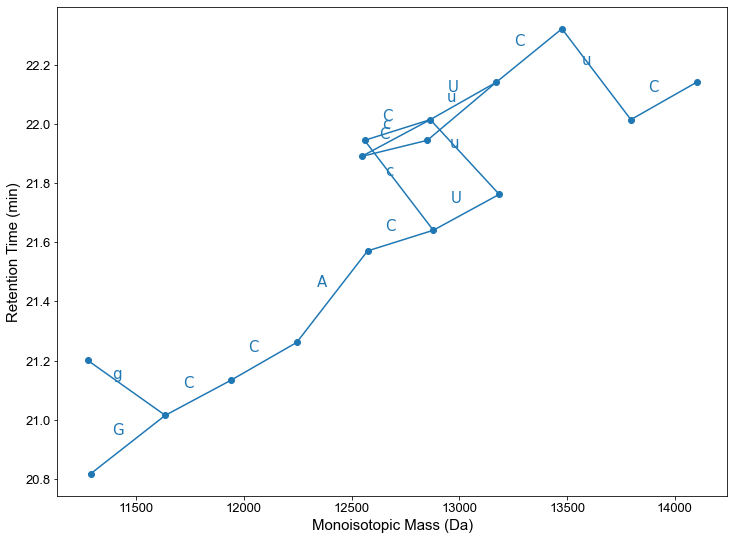

In [537]:
df_focus = groups[2][0].copy()
dfa = df_tmp.copy()
dfb = df_chosen.copy()
# dfa = df_chosen.copy()
# dfb = df_sample.drop(df_chosen.index).copy()
df_focus['focus'] = True
dfa['chosen'] = True
dfb['chosen'] = False
df_merge = pd.concat([df_focus, dfa, dfb]).drop_duplicates(subset=['Mass'])
bcr = base_calling_random(df_focus, silence=True)

# plotly_basecalling(*bcr, annotate=False)
plt, _ = plot_basecalling(*bcr, annotate=False)

name = 'mock' + '_3p_36G_to_41U'
df_merge.to_excel(f'/Users/bryan/Documents/BioPharmaFinder/BaoLab/FirstBatch/PaperData/Glu/{name}.xlsx')
plt.savefig(f'/Users/bryan/Documents/BioPharmaFinder/BaoLab/FirstBatch/PaperData/Glu/{name}.svg', dpi=300, transparent=True)

In [668]:
df_m = pd.read_excel('/Users/bryan/Documents/BioPharmaFinder/BaoLab/FirstBatch/PaperData/Glu/mock_5p_22G_to_44C.xlsx')
df_r = pd.read_excel('/Users/bryan/Documents/BioPharmaFinder/BaoLab/FirstBatch/PaperData/Glu/rsv_5p_20D_to_40G.xlsx')

In [669]:
df_m.head(), df_r.tail()

(   Unnamed: 0         Mass         RT        Vol  focus  chosen
 0        1611  8182.017038  19.694579  207754.78    1.0     NaN
 1        1844  8793.078885  20.134951  159504.65    1.0     NaN
 2        1874  7547.934499  19.075590  155967.32    1.0     NaN
 3        1894  8488.050259  19.943599  151478.04    1.0     NaN
 4        1977  9138.148742  20.384480  135165.46    1.0     NaN,
       Unnamed: 0          Mass         RT     Vol  focus  chosen
 1304       10154   7978.030350  19.505957  355.78    NaN     0.0
 1305       10157   6692.866511  17.627310  352.57    NaN     0.0
 1306       10160  10549.423854  21.002718  315.68    NaN     0.0
 1307       10164   6322.893764  16.583628  303.52    NaN     0.0
 1308       10170   8281.104885  19.059680  215.84    NaN     0.0)

# Complementary Data preparation 

In [11]:
# 5p
for idx, shift in enumerate(shifts):
    print(idx, shift)
    full_mass = 24581.37 + shift
    bcr = base_calling_random(df_matches[idx], silence=True)
    df_seats = process_mass_base_seats(*bcr, full_mass=full_mass, orientation=5)
    df_seats.to_excel(f'/Users/bryan/Documents/BioPharmaFinder/ZhangLab/Data/Outputs/seats_5p_{shift}da.xlsx')
    df_matches[idx].to_excel(f'/Users/bryan/Documents/BioPharmaFinder/ZhangLab/Data/Outputs/data_5p_{shift}da.xlsx')
    

0 4
1 16
2 22
3 28


In [ ]:
# 3p 76
for idx, shift in enumerate(shifts):
    full_mass = 24581.37 + shift
    df_match_reversed = df_matches[idx].copy()
    df_match_reversed.Mass = full_mass + 18.0106 - df_match_reversed.Mass
    bcr = base_calling_random(df_match_reversed, silence=True)
    df_seats = process_mass_base_seats(*bcr, full_mass=full_mass, orientation=5)
#     df_seats.to_excel(f'/Users/bryan/Documents/BioPharmaFinder/ZhangLab/Data/Outputs/seats_76_3p_{shift}da.xlsx')
    df_match_reversed.to_excel(f'/Users/bryan/Documents/BioPharmaFinder/ZhangLab/Data/Outputs/data_76_3p_{shift}da_rev.xlsx')
    df_matches[idx].to_excel(f'/Users/bryan/Documents/BioPharmaFinder/ZhangLab/Data/Outputs/data_76_3p_{shift}da.xlsx')
    

In [ ]:
# 3p 75
for idx, shift in enumerate(shifts):
    full_mass = 24252.31 + shift
    df_match_reversed = df_matches[idx].copy()
    df_match_reversed.Mass = full_mass + 18.0106 - df_match_reversed.Mass
    bcr = base_calling_random(df_match_reversed, silence=True)
    df_seats = process_mass_base_seats(*bcr, full_mass=full_mass, orientation=5)
#     df_seats.to_excel(f'/Users/bryan/Documents/BioPharmaFinder/ZhangLab/Data/Outputs/seats_75_3p_{shift}da.xlsx')
    df_match_reversed.to_excel(f'/Users/bryan/Documents/BioPharmaFinder/ZhangLab/Data/Outputs/data_75_3p_{shift}da_rev.xlsx')
    df_matches[idx].to_excel(f'/Users/bryan/Documents/BioPharmaFinder/ZhangLab/Data/Outputs/data_75_3p_{shift}da.xlsx')
    